In [1]:
%%HTML
<style>
    body {
        --vscode-font-family: "Baskerville"
        
    }
</style>

The twin satellites Sentinel-2A and Sentinel-2B were launched into space in 2015 and 2017. Both are part of ESA’s program for Global Monitoring for Environment and Security. Since then, both satellites monitor the world’s land cover changes and deforestation by taking thousands of images every day. As a manual analysis would be unfeasible, not only researchers but also corporationsare looking into automatic waysof labeling and evaluating the images. During your Master’s in Data Science, you had an introduction into Deep Learning. As you feel that Deep Learningis well suited to address this task, you bring it up during a meeting with your colleagues. However,  most  of  them  never  heard  anything  about Deep  Learning and  remain  very  skeptical. Therefore, you decide to demonstrate the effectiveness of Deep Learning on satellite data together with your partner.

Your partner collects a random set of images of five different land scenes: (1) Annual Crop, (2) Herbaceous Vegetation, (3) Highway, (4) Residential and (5) River. In addition, she provides you with an additional test-set. The true labels of this test-set are kept secret to you. The idea is that you train a Deep Learning model on the training-set and then demonstrate the effectiveness of Deep Learning on the test-set to your colleges.

Please, write a short report about your approach and submit a .pdf-file. Also, hand in your notebook with meaningfully comments. The prediction for the test-set should be submitted as a .csv-file.
1. The dataset is available at: https://uni-muenster.sciebo.de/s/8DmJFjFFy5utGt3 and make yourselves familiar with the dataset
2. Briefly explain why a Convolutional Neural Network is well suited for this task. Also explain why Flatten-Layer should be avoided. Which alternative should be used instead?
3. Explain, what the differences between “trainable params” and “non-trainable params” is. Which layer (of the ones discussed in class) comes with non-trainable parameters? What are these parameters used for?
4. Train a Deep Neural Network on the given Dataset. Note, that the test-folder is for later use! 20% of the given images should be used for validation to avoid overfitting
Hint: this task is very similar to the Linnaeus-Dataset. Feel free to use that notebook as an initial starting point.
5. Test your model on the test-set. As the true labels for the test-set are unknown, you cannot verify the results by yourselves. Therefore, store the predicted labels in a .csv-file. You only need two columns, one for the file-name and one for the predicted class. e.g.: 00000.jpg, Highway
6. Briefly state, why you choose your approach and which hyperparameter have you tried. You may also state what problems you may have encountered.

In [2]:
# 4
from tensorflow.keras import models, layers, Input
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# split the data in train and test
train_ds = image_dataset_from_directory("material/sat_data/classes",label_mode='categorical', batch_size=32, image_size=(48, 48), subset="training", validation_split=0.2, seed=123)
validation_ds = image_dataset_from_directory("material/sat_data/classes",label_mode='categorical', batch_size=32, image_size=(48, 48), subset="validation", validation_split=0.2, seed=123)


Found 10000 files belonging to 5 classes.
Using 8000 files for training.
Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-06-03 16:43:31.820082: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-03 16:43:31.820259: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Found 10000 files belonging to 5 classes.
Using 2000 files for validation.


In [3]:
# show the labels of the data
class_names = train_ds.class_names
print(class_names)

['AnnualCrop', 'HerbaceousVegetation', 'Highway', 'Residential', 'River']


2023-06-03 16:43:32.691502: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


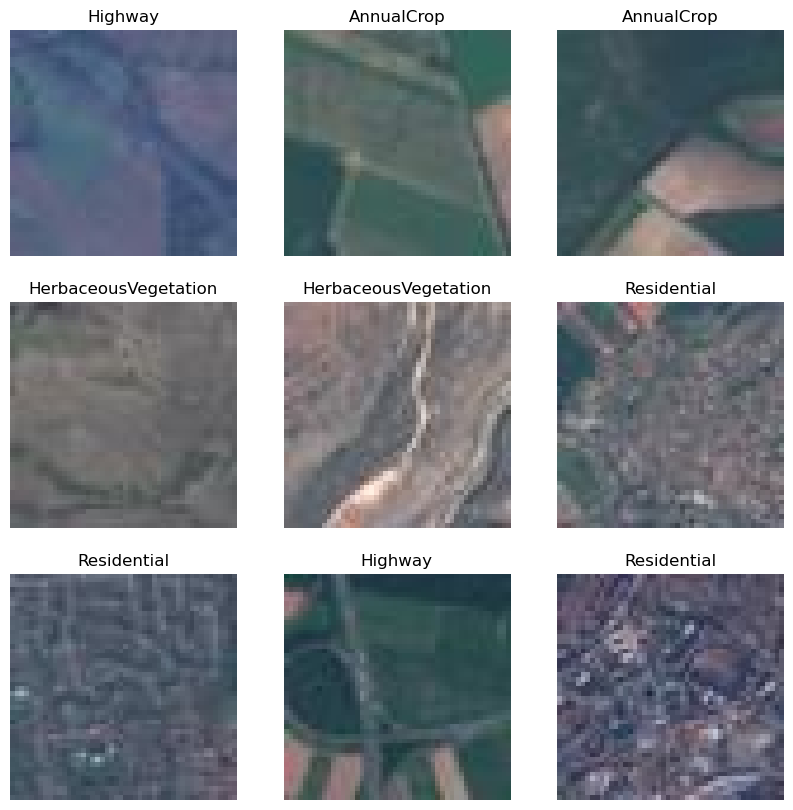

In [4]:
# show first 9 images and their labels
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[np.argmax(labels[i].numpy())])
        plt.axis("off")

In [41]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation=None, input_shape=(48,48,3)))
model.add(layers.BatchNormalization())
model.add(layers.ReLU()) 
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation=None))
model.add(layers.BatchNormalization())
model.add(layers.ReLU()) 
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))


model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation=None))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), activation=None))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())

model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dropout(0.7))
model.add(layers.Dense(units=5, activation = 'softmax'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 46, 46, 32)        896       
                                                                 
 batch_normalization_51 (Bat  (None, 46, 46, 32)       128       
 chNormalization)                                                
                                                                 
 re_lu_51 (ReLU)             (None, 46, 46, 32)        0         
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 22, 22, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 20, 20, 64)        18496     
                                                                 
 batch_normalization_52 (Bat  (None, 20, 20, 64)     

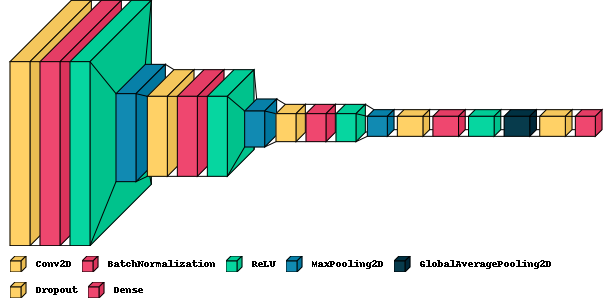

In [71]:
visualkeras.layered_view(model, legend=True)  # font is optional!


In [42]:
model.compile(loss='CategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
history = model.fit_generator(generator=train_ds, validation_data=validation_ds, epochs=50, verbose=1)

Epoch 1/50
  3/250 [..............................] - ETA: 11s - loss: 1.2151 - accuracy: 0.5729

/var/folders/_v/2880g7zd26g1g7wjtm4z4b8c0000gn/T/ipykernel_9908/3777541675.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_ds, validation_data=validation_ds, epochs=50, verbose=1)


250/250 [==============================] - ETA: 0s - loss: 0.8618 - accuracy: 0.6779

2023-06-03 17:18:01.189579: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


250/250 [==============================] - 10s 40ms/step - loss: 0.8618 - accuracy: 0.6779 - val_loss: 1.6088 - val_accuracy: 0.5080
Epoch 2/50
250/250 [==============================] - 7s 30ms/step - loss: 0.5977 - accuracy: 0.7705 - val_loss: 1.3012 - val_accuracy: 0.5680
Epoch 3/50
250/250 [==============================] - 8s 33ms/step - loss: 0.5035 - accuracy: 0.8121 - val_loss: 1.1811 - val_accuracy: 0.6045
Epoch 4/50
250/250 [==============================] - 7s 29ms/step - loss: 0.4637 - accuracy: 0.8261 - val_loss: 1.0842 - val_accuracy: 0.6135
Epoch 5/50
250/250 [==============================] - 7s 29ms/step - loss: 0.4037 - accuracy: 0.8528 - val_loss: 1.1076 - val_accuracy: 0.6815
Epoch 6/50
250/250 [==============================] - 7s 29ms/step - loss: 0.3787 - accuracy: 0.8618 - val_loss: 0.6857 - val_accuracy: 0.7175
Epoch 7/50
250/250 [==============================] - 8s 31ms/step - loss: 0.3266 - accuracy: 0.8831 - val_loss: 0.7995 - val_accuracy: 0.7285
Epoch 8/5

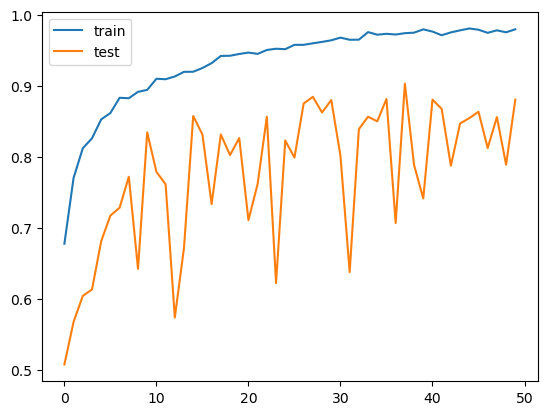

In [45]:
# plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [64]:
# save the model
#model.save("model.h5")

# load the model
#model = models.load_model("model.h5")


In [77]:
# predict and save the predictions and real values for each item of the test set
predictions = []
real_values = []
for x,y in validation_ds:
    real = np.argmax(y, axis=1)
    real_values.extend(real)

    pred = model.predict_on_batch(x)
    pred = np.argmax(pred, axis=1)
    predictions.extend(pred)

    print("Real values: ", real)
    print("Predicted values: ", pred)
    print("-------------------")


Real values:  [0 2 0 3 0 0 0 2 4 4 3 1 3 4 4 2 0 2 2 0 2 4 1 3 4 0 4 2 3 0 4 0]
Predicted values:  [1 2 0 3 0 0 0 2 4 4 3 1 3 4 4 2 1 2 0 0 2 4 1 3 4 0 4 2 3 0 4 0]
-------------------
Real values:  [3 1 3 3 3 4 2 0 1 3 1 4 4 2 0 0 2 2 1 0 3 1 3 2 1 2 4 2 1 0 0 1]
Predicted values:  [3 1 3 3 3 4 3 0 1 3 1 4 4 2 1 0 2 3 1 0 3 1 3 2 1 4 4 2 1 2 1 1]
-------------------
Real values:  [4 3 3 4 0 2 3 3 2 0 3 3 3 3 3 3 4 4 4 0 3 1 4 1 2 4 2 2 2 3 1 2]
Predicted values:  [4 3 1 4 2 2 3 3 2 0 3 3 3 3 3 3 4 4 2 0 3 1 4 1 2 4 2 1 2 3 1 2]
-------------------
Real values:  [4 0 2 4 3 3 1 1 4 1 3 0 1 2 2 2 1 4 0 4 1 3 3 1 1 3 4 2 1 2 4 3]
Predicted values:  [4 0 2 4 3 3 1 1 4 1 3 0 1 2 2 2 1 4 2 2 1 3 3 1 1 3 4 2 1 2 4 3]
-------------------
Real values:  [2 1 3 0 0 2 3 0 2 0 3 3 3 3 4 2 3 4 4 2 2 1 2 4 2 2 0 0 3 3 4 4]
Predicted values:  [3 1 3 0 0 2 3 0 2 2 3 3 1 3 4 2 3 2 4 2 2 1 2 4 2 2 0 0 3 3 4 4]
-------------------
Real values:  [2 3 1 2 3 1 0 2 1 3 3 2 2 4 4 0 3 3 1 3 3 4 4 0 3 2 1 3 4 2 

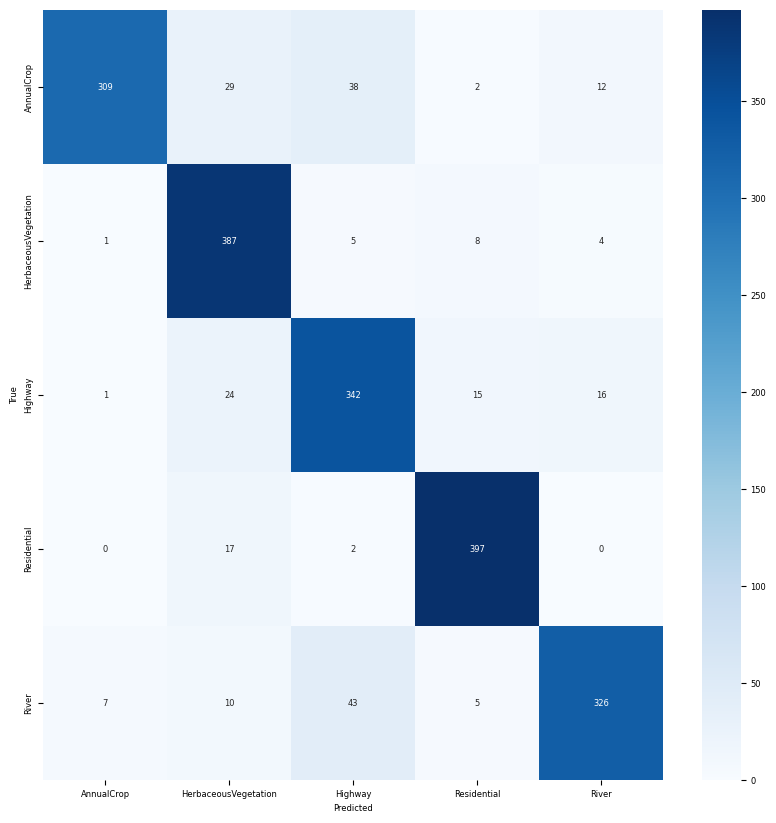

In [78]:
#create a confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(real_values, predictions)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)

plt.figure(figsize=(10, 10))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [79]:
# calculate the precision and recall for each class
from sklearn.metrics import precision_recall_fscore_support
precision, recall, fscore, support = precision_recall_fscore_support(real_values, predictions)
print("Precision: ", precision)
print("Recall: ", recall)
print("Fscore: ", fscore)
print("Support: ", support)

df_measures = pd.DataFrame({"Precision": precision, "Recall": recall, "Fscore": fscore, "Support": support}, index=class_names)
df_measures



Precision:  [0.97169811 0.82869379 0.79534884 0.92974239 0.91061453]
Recall:  [0.79230769 0.95555556 0.85929648 0.95432692 0.83375959]
Fscore:  [0.87288136 0.88761468 0.82608696 0.94187426 0.87049399]
Support:  [390 405 398 416 391]


,Precision,Recall,Fscore,Support
AnnualCrop,0.971698,0.792308,0.872881,390
HerbaceousVegetation,0.828694,0.955556,0.887615,405
Highway,0.795349,0.859296,0.826087,398
Residential,0.929742,0.954327,0.941874,416
River,0.910615,0.833760,0.870494,391


In [80]:
# calculate the overall accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(real_values, predictions)
print("Accuracy: ", accuracy)

Accuracy:  0.8805


1/1 [==============================] - 0s 18ms/step


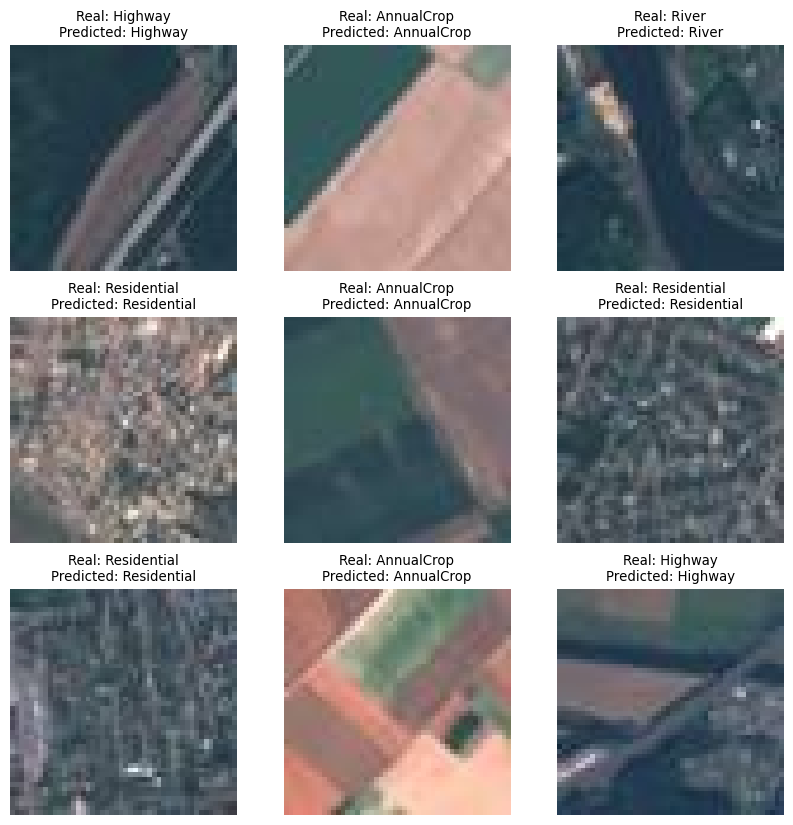

In [51]:
#show the first 9 images of the test set and predict the label
plt.figure(figsize=(10, 10))
for images, labels in validation_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        real_class = class_names[np.argmax(labels[i].numpy())]
        predicted_class = class_names[np.argmax(model.predict(images)[i])]
        plt.rcParams.update({'font.size': 8})
        plt.title("Real: " + real_class + "\nPredicted: " + predicted_class)
        plt.axis("off")


In [52]:
# predict a class for each image in the test folder
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import tensorflow
import numpy as np

test_ds = image_dataset_from_directory("material/sat_data/test",label_mode=None, batch_size=32, image_size=(48, 48), shuffle=False)

Found 2000 files belonging to 1 classes.


In [53]:
# predict the class of each label
predictions = []
prediction_labels = []
for images in test_ds.take(-1):
        predicted_class = model.predict_on_batch(images)
        predicted_class = np.argmax(predicted_class, axis=1)
        predictions.extend(predicted_class)


2000

In [54]:
# create a dataframe with the image path and the predicted class
df_prediction = pd.DataFrame({'image_path': test_ds.file_paths, 'class': predictions})
df_prediction.head()

,image_path,class
0,material/sat_data/test/00000.jpg,2
1,material/sat_data/test/00001.jpg,2
2,material/sat_data/test/00002.jpg,2
3,material/sat_data/test/00003.jpg,2
4,material/sat_data/test/00004.jpg,2


In [55]:
# add labels to the dataframe
df_prediction['label'] = df_prediction['class'].apply(lambda x: class_names[x])
df_prediction.head()

,image_path,class,label
0,material/sat_data/test/00000.jpg,2,Highway
1,material/sat_data/test/00001.jpg,2,Highway
2,material/sat_data/test/00002.jpg,2,Highway
3,material/sat_data/test/00003.jpg,2,Highway
4,material/sat_data/test/00004.jpg,2,Highway


In [56]:
# clean the image path
df_prediction['image_path'] = df_prediction['image_path'].str.replace('material/sat_data/test/', '')
df_prediction.head()

,image_path,class,label
0,00000.jpg,2,Highway
1,00001.jpg,2,Highway
2,00002.jpg,2,Highway
3,00003.jpg,2,Highway
4,00004.jpg,2,Highway


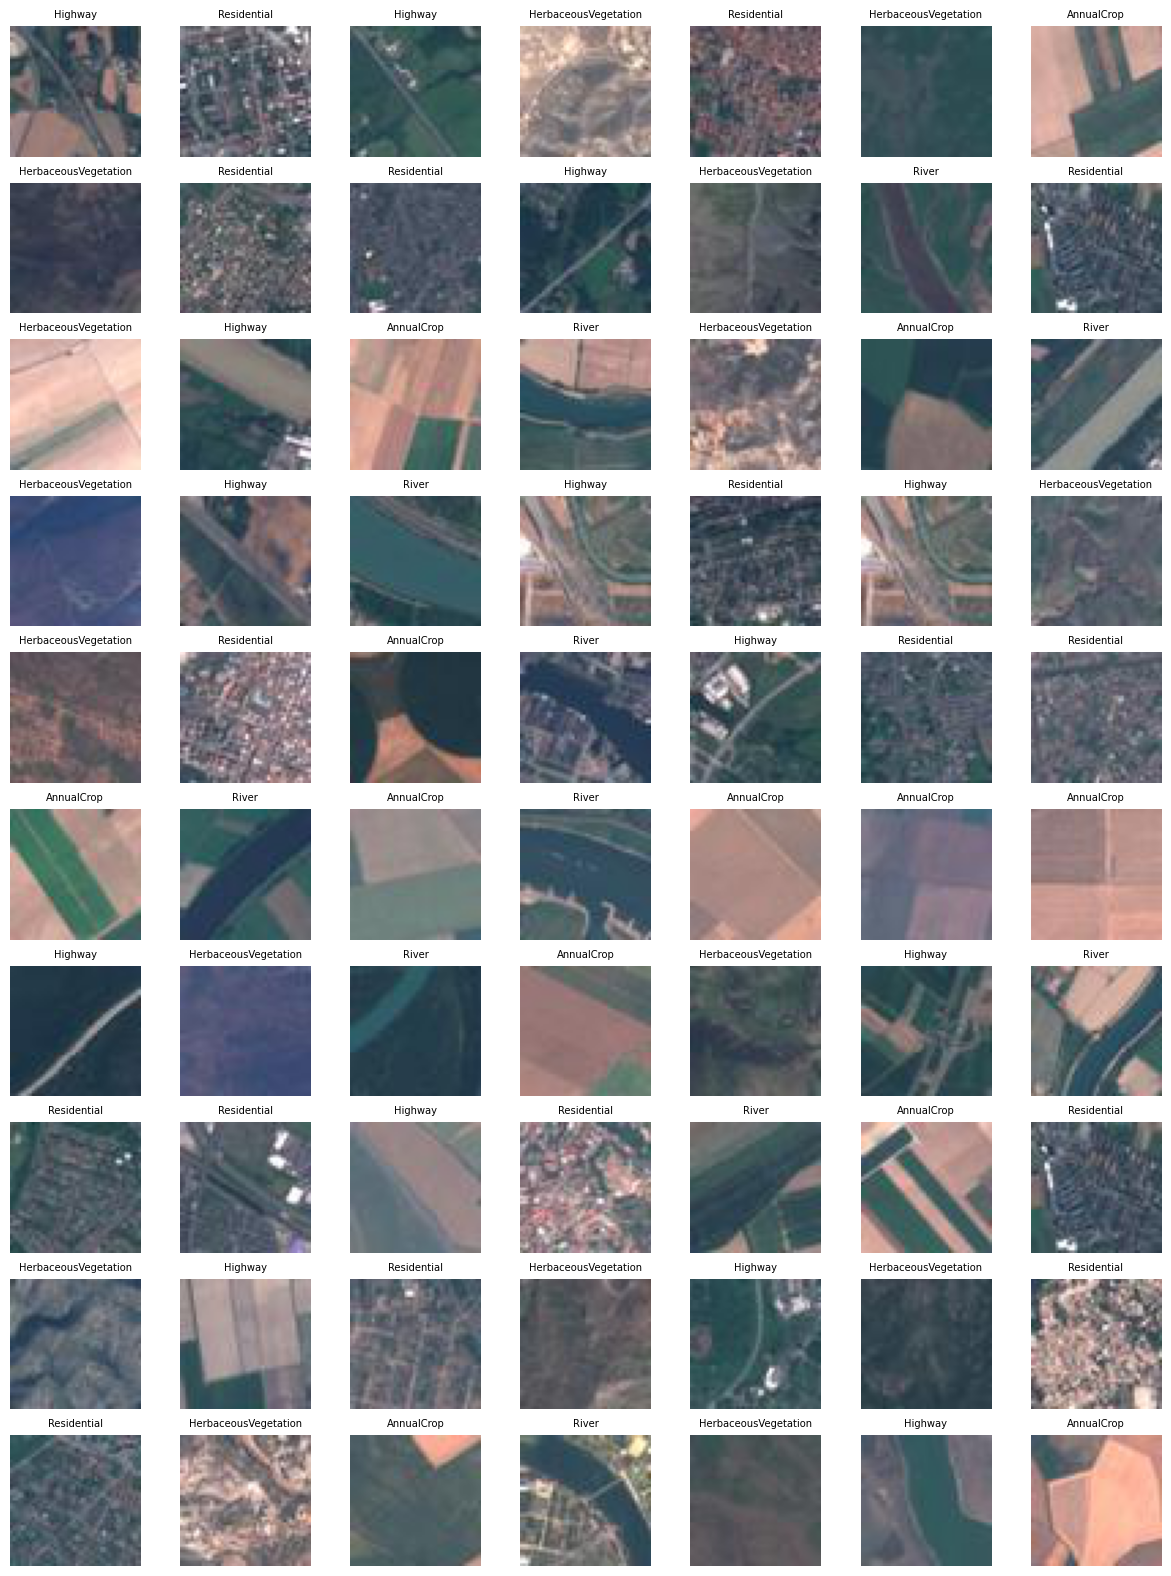

In [60]:
# show 15 random images and their predicted label
import random
import matplotlib.image as mpimg

plt.figure(figsize=(15, 20))
for i in range(70):
    ax = plt.subplot(10, 7, i + 1)
    random_index = random.randint(0, len(df_prediction))
    img = mpimg.imread('material/sat_data/test/'+df_prediction.iloc[random_index]['image_path'])
    plt.imshow(img)
    plt.rcParams.update({'font.size': 6})
    plt.title(df_prediction.iloc[random_index]['label'])
    plt.axis("off")

In [61]:
# save the dataframe as csv
df_prediction.to_csv('predictions.csv', index=False)